# Predicting customer churn using the Telecom database

In [1]:
import pandas as pd
raw_data = pd.read_csv("customer_data.csv")

Getting information about the dataset for finding out if there are any missing values or 'NaN'

In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [3]:
raw_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Determining the categorical variables within the data:
Since many ML algorithms take the input data in numeric form we need to determine which variables rae categorical and then convert it into numeric classes.  

In [4]:
raw_data.select_dtypes(include=['O']).columns.values

array(['state', 'phone number', 'international plan', 'voice mail plan'],
      dtype=object)

In [5]:
raw_data.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,365-3493,no,no
freq,106,1,3010,2411


We can observe that all the phone numbers are unique and hence they won't provide much information regarding the final classification. Feel free to drop it at this stage however I plan to explore it's ramifications so I might as well just hold on to it for some more time.
Here we can see that there are 51 unique states and 2 unique quantities for both the international plan and the voice plan. I guess a good approach would be to find how the data is distriibuted within our categories, just to get a better sense as to how we deal with our categorical variables.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

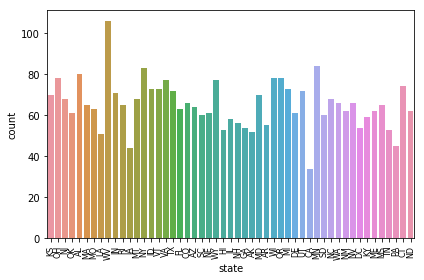

In [7]:
sns.countplot(raw_data['state'])
plt.xticks(fontsize = 8, rotation = 90)
plt.tight_layout()
plt.show()

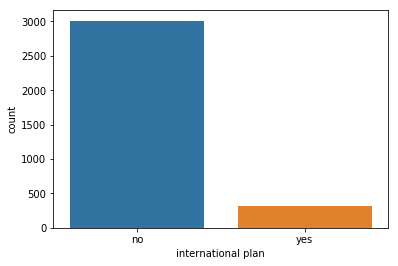

In [8]:
sns.countplot(raw_data['international plan'])
plt.show()

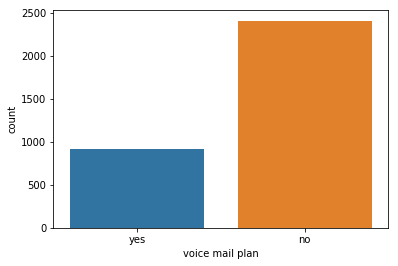

In [9]:
sns.countplot(raw_data['voice mail plan'])
plt.show()

As we can see from the distributions of the categorical variables there are significant number of instances in each of the category and there is no oddity or a category which rarely occurs so we can represent the categorical variables as integers.

In [10]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
state_mapping = dict(zip(raw_data['state'], number.fit_transform(raw_data['state'].astype('str'))))
raw_data['state'] = number.fit_transform(raw_data['state'].astype('str'))

international_plan_mapping = dict(zip(raw_data['international plan'], number.fit_transform(raw_data['international plan'].astype('str'))))
raw_data['international plan'] = number.fit_transform(raw_data['international plan'].astype('str'))

voice_mail_plan_mapping = dict(zip(raw_data['voice mail plan'], number.fit_transform(raw_data['voice mail plan'].astype('str'))))
raw_data['voice mail plan'] = number.fit_transform(raw_data['voice mail plan'].astype('str'))



In [11]:
raw_data['phone number'] = number.fit_transform(raw_data['phone number'].astype('str'))

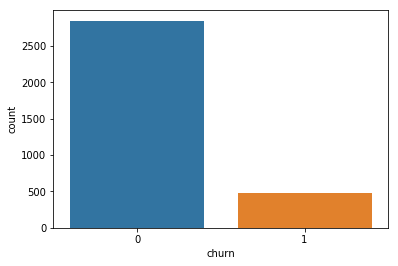

In [12]:
# Converting Boolen values to integer; False being mapped to zero whereas True is mapped to one
raw_data[['churn']] = raw_data[['churn']].astype(int)
sns.countplot(raw_data['churn'])
plt.show()

In [13]:
# Trying to determine the traits across the two categorie in order to get more insight.
raw_data.groupby('churn').mean()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,,,,,
0,26.011930,100.793684,437.074737,1663.771579,0.065263,0.295439,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,26.339545,102.664596,437.817805,1679.149068,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


From the output of the previous cell we can make the following comments about the people who do churn.
- They are more or less evenly distributed across all states
- Larger fraction of the people subscribed to the international plan
- Greater fraction of the people who churned did not have the voice mail plan as compared to the people who stayed on
- Had lesser amount of voice mail messages (obvious considering the previous plan)
- Spent longer times on calls resulting in greater charge
- Had a greater amount of customer service calls

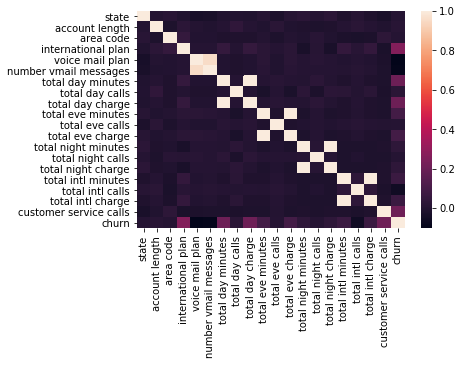

In [14]:
# Plotting a heat map
data = raw_data.drop(columns = ['phone number'])
import numpy as np
corr = data.corr()
sns.heatmap(corr)
plt.show()

Text(0,0.5,'Frequency of Churn')

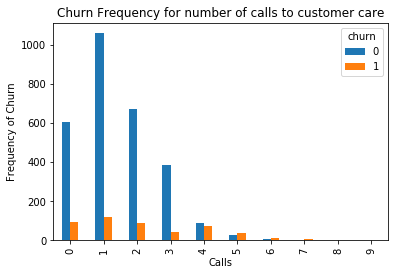

In [15]:
# For a zoomed view
pd.crosstab(data['customer service calls'],data.churn).plot(kind='bar')
plt.title('Churn Frequency for number of calls to customer care')
plt.xlabel('Calls')
plt.ylabel('Frequency of Churn')
#plt.savefig('purchase_fre_job')

In [16]:
print(international_plan_mapping)
print(voice_mail_plan_mapping)

{'no': 0, 'yes': 1}
{'yes': 1, 'no': 0}


In [17]:
Y = data['churn']
X = data.drop(columns = ['churn'])

# Logistic Regression

First method we'll be trying out is **Binary Logistic Regression**.
Logistic Regression returns the probability that the experiment is a success.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
log_reg = LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(log_reg, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

C:\Users\Rohit Tawde\anacondba\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Rohit Tawde\anacondba\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 1},
 0.8639455782312925,
 [mean: 0.85794, std: 0.00219, params: {'C': 0.0001},
  mean: 0.85914, std: 0.00291, params: {'C': 0.001},
  mean: 0.86034, std: 0.00775, params: {'C': 0.1},
  mean: 0.86395, std: 0.01262, params: {'C': 1},
  mean: 0.86154, std: 0.01143, params: {'C': 10},
  mean: 0.86275, std: 0.01271, params: {'C': 100}])

In [20]:
log_reg_2 = LogisticRegression(C = 1)
log_reg_2.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predict = log_reg_2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy form Logistic Regression: ")
print(accuracy_score(predict, Y_test))

Accuracy form Logistic Regression: 
0.8621103117505995


In [22]:
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, predict)
print(confusion_matrix)

[[696  19]
 [ 96  23]]


Confusion Matrix quantifies the conditions represented below: With rows being the observed and columns being the predicted values.

True Negative  | False Positive

False Negative | True Positive

Thus 96 people which Logistic Regression predicted won't churn actually end up churning. This false negative examples can be very risky as the company would end up end up losing the customers without getting any chance of incentivizing them.

19 People which form a false negative were predicted to churn but won't. This will also have financial ramifications because we end up overincentivising loyal customers. 

The tolerance with repsct to the false positives and false negatives is a part of business administration. They need to determine which is the lesser of the two evils and to what extent. 

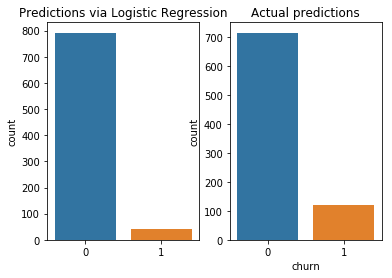

In [23]:
# Representation of the predicted v/s the actual distributions.
plt.figure()
plt.subplot(1,2,1)
sns.countplot(predict)
plt.title("Predictions via Logistic Regression")

plt.subplot(1,2,2)
sns.countplot(Y_test)
plt.title("Actual predictions")

plt.show()

True Positive Rate (Recall): Ratio of true positives v/s observed positives
False Positive Rate : Ratio of false positives v/s observed negatives
Precison : What percent of the predicted positives were correct
f1 score is the harmonic score of precision and recall, gives an overall estimate of the false positives and false negatives.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       715
          1       0.55      0.19      0.29       119

avg / total       0.83      0.86      0.83       834



(array([401., 212.,  87.,  52.,  28.,  21.,  14.,   9.,   7.,   3.]),
 array([ 0.2984747 ,  9.19599336, 18.09351201, 26.99103067, 35.88854933,
        44.78606799, 53.68358665, 62.5811053 , 71.47862396, 80.37614262,
        89.27366128]),
 <a list of 10 Patch objects>)

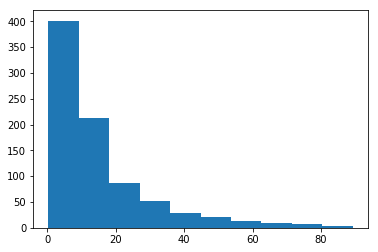

In [25]:
# Probability distribution of the "churning" customers
plt.hist(log_reg_2.predict_proba(X_test)[:,1]*100)

Since this is not a balanced dataset we can see that the probablities histogram is actually pretty skewed to the left.

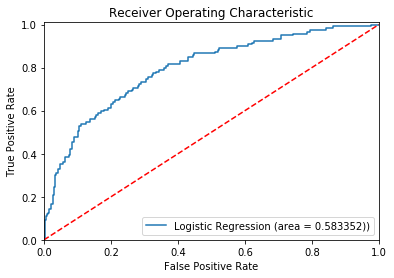

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_reg_area_under_curve = roc_auc_score(Y_test, predict)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, log_reg_2.predict_proba(X_test)[:,1])

plt.plot(false_positive_rate, true_positive_rate, label = 'Logistic Regression (area = %f))' %log_reg_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Dabbling into the business application

The cost associated with the true negatives is zero since they are customers which will remain loyal for sure.
False Positives are those which our classifier predicts to chrun but they won't churn but they will be offered some incentive to stay. So the cost associated with FP will be `cost of incentivizing` say 100.
False negatives will have the most impact because the company might lose the annual revenue associated with those customers ammounting to `revenue loss` say 1000.
True positives will be offered incentives and let's say that some of them stay so the cost associated will be in two parts. Assuming `x` say 0.5 fraction of people don't churn.
- x * Cost of incentivizing
- (1-x) * revenue loss

*This is a very simple cost evaluation metric for illustration purposes*
The following part is inspired from CS-109 Harvard University: https://github.com/cs109/2015lab6/blob/master/lab6-churn.ipynb 

In [31]:
# Initializing the costs
x = 0.5
cost_tn = 0
cost_fp = 100
cost_fn = 1000
cost_tp = x * 100 + (1 - x) * 1000
cost_matrix = np.array([[cost_tn, cost_fp],[cost_fn, cost_tp]])
cost_matrix

array([[   0.,  100.],
       [1000.,  550.]])

In [50]:
# Function to evaluate the average cost
def average_cost(y, ypred, cost):
    from sklearn.metrics import confusion_matrix
    c=confusion_matrix(y,ypred)
    score=np.sum(c*cost)/np.sum(c)
    return score

Evaluating the baseline costs using the following scenarios
- All customers churn
- None of them churn

In [51]:
# All customers churn
All = np.ones(len(Y_test), dtype = "int")
print("Confusion matrix if all customers churn")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, All)
print(confusion_matrix)
print ("\n Corresponding cost is:")
print(average_cost(Y_test, All, cost_matrix))

Confusion matrix if all customers churn
[[  0 715]
 [  0 119]]

 Corresponding cost is:
164.20863309352518


In [56]:
# No customers churn
Non_e = np.zeros(len(Y_test), dtype = "int") 
print("Confusion matrix if no customers churn")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Non_e)
print(confusion_matrix)
print ("\n Corresponding cost is:")
print(average_cost(Y_test, Non_e, cost_matrix))

Confusion matrix if no customers churn
[[715   0]
 [119   0]]

 Corresponding cost is:
142.68585131894486


In [58]:
print("Now we check if our Logistic Regression model is useful in providing us with a lower cost")
print(average_cost(Y_test, predict, cost_matrix))

Now we check if our Logistic Regression model is useful in providing us with a lower cost
132.55395683453239


Our logistic regression model is providing us with a meaningful classification and lowering our average cost. However we don't have an equal weight for the False positives and the false negatives so we need to alter the decision boundary (thershold probability for Logistic Regression) so that we can get an optimum cost. 

In [59]:
def repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 >= t)*1
    return ypred

In [62]:
t1 = repredict(log_reg_2, 0.3, X_test)
print(average_cost(Y_test, t1, cost_matrix))

119.60431654676259

Thus we observe that changing the threshold from 0.5 to 0.3 does yield an "improvement" in the average cost.

From decision theory we can get a ballpark for the lowest average cost we can expect. 

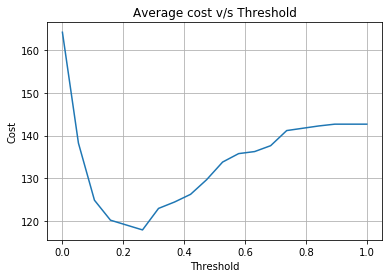

In [89]:
ts = np.linspace(0,1,20)
plt.plot(ts, [average_cost(Y_test, repredict(log_reg_2, t, X_test), cost_matrix) for t in ts] )
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.title("Average cost v/s Threshold")
plt.grid()
plt.show()